# Numerische Methoden für Systeme

### 1.3 Verständnisfragen

1. Was verstehen Sie unter einem konservativen numerischen Verfahren?


 2. Das klassische Runge-Kutta-Verfahren ist ”nahezu” konservativ. Was bedeutet das? Worauf müssen Sie achten,
 wenn Sie das Runge-Kutta-Verfahren für die Lösung von Stabilitätsproblemen einsetzen wollen.

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
p       = 1.184  # kg/m^3
Ca      = 0.45  # constant
Rkugel  = 0.1   # m
m       = 0.05  # kg
g       = 9.81  # m/s^2
ks      = 0.05  # N/m
v0      = 0.0     # m/s
k       = 0.5 * Ca * p * np.pi * Rkugel**2 
print(k)

0.00836920282916321


### 1.4 Aufgaben


### 1. Differentialgleichung und Anfangswertproblem

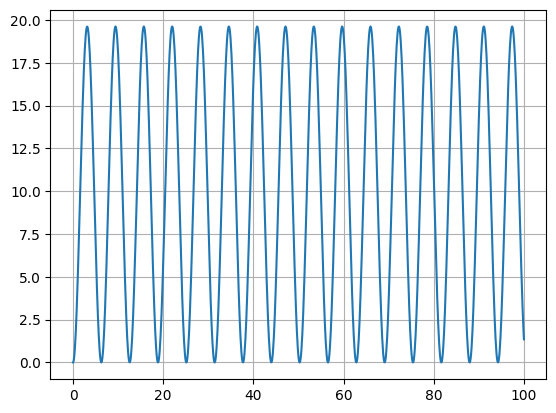

In [116]:
def model1(x):
    x0 = x[0] # x
    x1 = x[1] # dx
    return np.array([x1, g - (ks*x0/m)-(k/m)*(x1+v0)**2 * mysign(x1+v0)])
    
def model1_df(x,y):
    return (x**2)/(y**2)
    
def model1_analytisch(x):
    x = (m*g/ks) * (1-np.cos(np.sqrt(ks/m)*x))
    dx = np.sqrt(m/ks)*g * np.sin(np.sqrt(ks/m)*x)
    return x, dx


# Signum Funktion
def mysign(x): # numpy sign liefert 0 für 0
    if x >= 0:
        return 1
    else:
        return -1
    

tdata_model = np.linspace(0, 100, 1000)
plt.plot(tdata_model, model1_analytisch(tdata_model)[0], label='Analytisch')
plt.grid()
plt.show()

### 2. gDgln lösen mit RK4 Verfahren

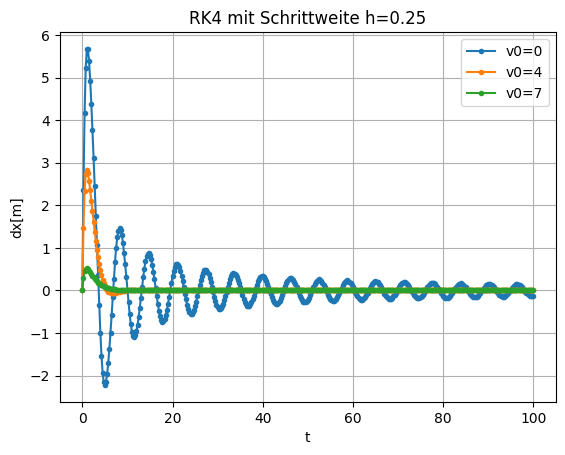

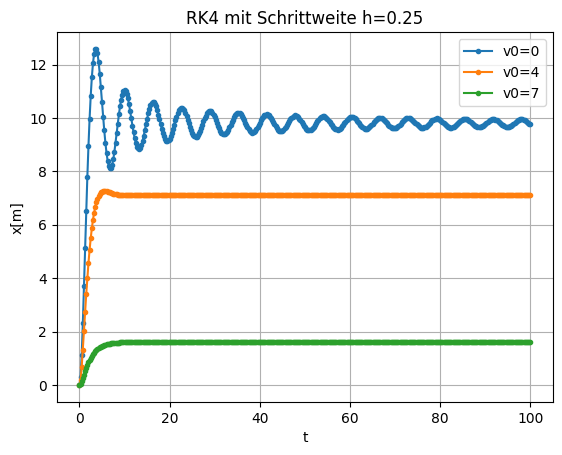

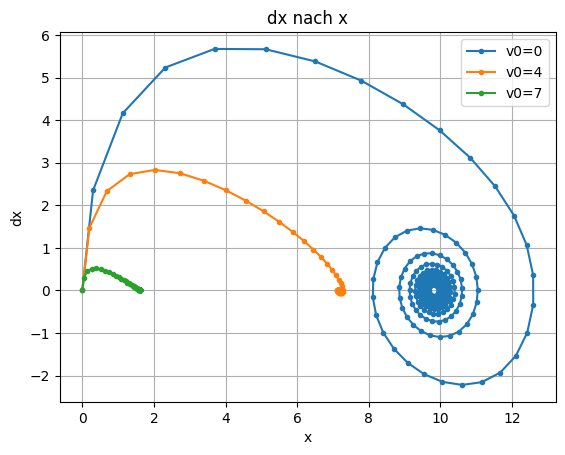

In [117]:
# Verfahren Runge-Kutta-Verfahren (RK4) (für ein autonomes System)
# Eine zweite Lösung für das RK4-Verfahren.

def runga_kutta_RK4_2Systeme(x0, tend, h, f):
    # x0: Anfangswerte
    # y0: Anfangswerte
    # tend: Zeit bis zum Ende
    # h: Schrittweite
    # f: Funktion mit n Gleichungen
    
    N = int(tend / h) +1

    # Vektor mit dx-daten und x-daten
    x = np.array([np.zeros((N)), np.zeros((N))])

    # Zeitvektor
    t = np.zeros((N))
    
    x[0][0] = x0[0]
    x[1][0] = x0[1]

    for i in range(1, N):
        t[i] = t[i-1] + h

        k1 = f([x[0][i-1],               x[1][i-1]])
        k2 = f([x[0][i-1] + 0.5*h*k1[1], x[1][i-1] + 0.5*h*k1[0]])
        k3 = f([x[0][i-1] + 0.5*h*k2[1], x[1][i-1] + 0.5*h*k2[0]])
        k4 = f([x[0][i-1] + h*k3[1],     x[1][i-1] + h*k3[0]])

        x[0][i] = x[0][i-1] + h*((1/6)*k1[1] + (1/3)*k2[1] + (1/3)*k3[1] + (1/6)*k4[1]) #dx
        x[1][i] = x[1][i-1] + h*((1/6)*k1[0] + (1/3)*k2[0] + (1/3)*k3[0] + (1/6)*k4[0]) #x

    return x, t


def model1(x):
    x0 = x[0] # dx
    x1 = x[1] # x
    return np.array([x0,  -(k/m)*(x0+v0)*np.abs(x0+v0) - ((ks*x1)/m) + g])

x0 = (0, 0)
tend = 100
h = 0.25

v0 = 0.0
v0_x, t = runga_kutta_RK4_2Systeme(x0, tend, h, model1)
v0 = 4.0
v4_x, t = runga_kutta_RK4_2Systeme(x0, tend, h, model1)
v0 = 7.0
v7_x, t = runga_kutta_RK4_2Systeme(x0, tend, h, model1)


# =================== Plot erstellen ===================
plt.figure(2)
plt.plot(t, v0_x[0],  '.-', label='v0=0')
plt.plot(t, v4_x[0],  '.-', label='v0=4')
plt.plot(t, v7_x[0],  '.-', label='v0=7')
plt.ylabel('dx[m]')
plt.xlabel('t')
plt.title('RK4 mit Schrittweite h=0.25')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(t, v0_x[1],  '.-', label='v0=0')
plt.plot(t, v4_x[1],  '.-', label='v0=4')
plt.plot(t, v7_x[1],  '.-', label='v0=7')
plt.ylabel('x[m]')
plt.xlabel('t')
plt.title('RK4 mit Schrittweite h=0.25')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(4)
plt.plot(v0_x[1], v0_x[0],  '.-', label='v0=0')
plt.plot(v4_x[1], v4_x[0],  '.-', label='v0=4')
plt.plot(v7_x[1], v7_x[0],  '.-', label='v0=7')
plt.ylabel('dx')
plt.xlabel('x')
plt.title('dx nach x')
plt.legend()
plt.grid(True)
plt.show()

In [118]:
# zweite (evt. einfachere) Lösung für RK4
 
v0 = np.array([0, 4, np.sqrt(ks*m)/k, 7, np.sqrt(m*g/k)])  #m/s
 
def f(t, x,v):
    return np.array([x[1], -(1/m) * np.sign(x[1]+v) * k * (x[1]+v)**2 -(1/m)*ks*x[0]+g])
 
def RK4(t0,x0,h,tend,f,v ):
    N = int((tend - t0) / h)
    t = np.zeros(N+1)
    x = np.zeros((N+1,np.shape(x0)[0]))
    
    t[0] = t0
    x[0,:] = x0
    for i in range(1, N+1):
        t[i] = t[i-1] + h

        k1 = f(t[i-1], x[i-1,:], v)
        k2 = f(t[i-1] + 0.5*h, x[i-1,:] + 0.5*h*k1, v)
        k3 = f(t[i-1] + 0.5*h, x[i-1,:] + 0.5*h*k2, v)
        k4 = f(t[i-1] + h, x[i-1,:] + h*k3, v)
        x[i,:] = x[i-1,:] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    return t, x

#print(v0[4])
t, x0 = RK4(0, np.array([0,0]), 0.25, 100, f, v0[0])

#plt.figure(3)
#plt.plot(t,x0,  'o-', label='v0=0')
#plt.plot(x0[:,0],x0[:,1],  'o-', label='v0=0')
#plt.ylabel('x[m]')
#plt.xlabel('t')
#plt.title('RK4 mit Schrittweite h=0.25')
#plt.legend()
#plt.grid(True)
#plt.show()

### 3. Optional

### 4. gDgln lösen mit Impliziten Mittelpunktregel

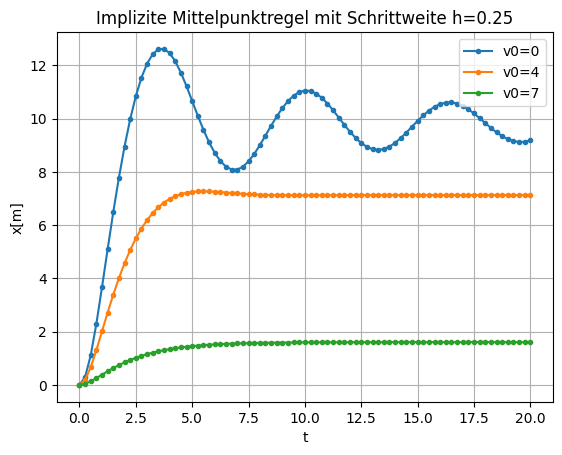

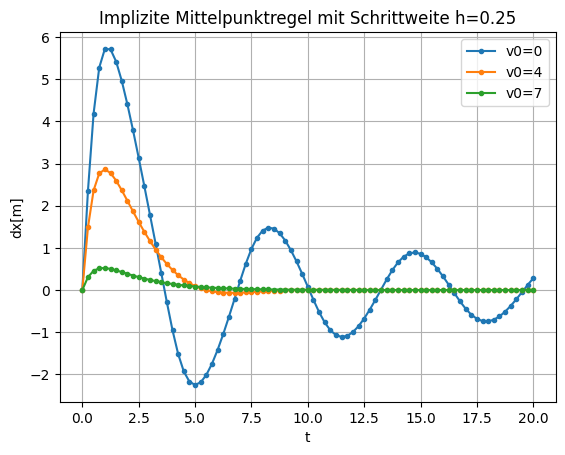

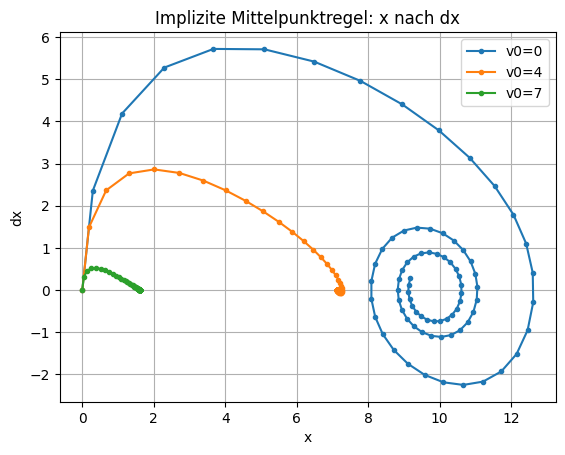

In [149]:
# C | A  =  1/2 | 1/2
#   | B  =      | 1
def runga_kutta_RK4_2Systeme_implizit(x0, h, tend, f, df, tol):
    # x0: Startpunkt
    # X: Endpunkt
    # f: Funktion
    # df: Jacobi Matrix der Funktion f
    # N: Anzahl der Schritte
    # tol: Toleranz
    max_iter=20

    N = int(tend / h)+1
    t = np.zeros(N)
    x = np.zeros((N,np.shape(x0)[0]))
   
    x[0,:] = x0
    k = f(t[0], x[0,:])

    for i in range(1,N):
        step = 0
        t[i] = t[i-1] + h

        r = k - f(x[i-1], x[i-1] + (h*0.5*k))
        J = -df(t[i-1] + h*0.5, x[i-1] + (h*k*0.5))
        # einheitsmatrix:
        I2 = np.eye(2)
        M = I2 - h * 0.5 * J


        while (np.abs(r[0]) > tol or np.abs(r[1]) > tol) and step < max_iter :
            # Solve linear system with LR
            b = -r
            ATA = np.dot(M.T, M)
            ATb = np.dot(M.T, b)
            delta_k = np.linalg.solve(ATA, ATb)
            k = k + delta_k
            r = k - f(t[i-1] + h*0.5, x[i-1] + (h*k*0.5))
            step += 1

        x[i,:] = x[i-1,:] + h*k
       
    return x, t


def model1(t, x):
    x1 = x[0] # x
    x0 = x[1] # dx
    return np.array([x0,  -(k/m)*(x0+v0)*np.abs(x0+v0) - ((ks*x1)/m) + g])

def model1_df(t, x):
    x0 = x[0] # dx
    x1 = x[1] # x
    return np.array([[0, 1], 
                    [-ks/m, -(k/m)*2*np.abs(x0)]])

# Anfangswerte, Endzeitpunkt und Schrittweite einstellen
x0 = (0, 0)
tend = 20
h = 0.25

v0 = 0.0
v0_x, t = runga_kutta_RK4_2Systeme_implizit(x0, h, tend, model1, model1_df, 1e-3)
v0 = 4.0
v4_x, t = runga_kutta_RK4_2Systeme_implizit(x0, h, tend, model1, model1_df, 1e-3)
v0 = 7.0
v7_x, t = runga_kutta_RK4_2Systeme_implizit(x0, h, tend, model1, model1_df, 1e-3)

# =================== Plot erstellen ===================

plt.figure(5)
plt.plot(t, v0_x[:,0],  '.-', label='v0=0')
plt.plot(t, v4_x[:,0],  '.-', label='v0=4')
plt.plot(t, v7_x[:,0],  '.-', label='v0=7')
plt.ylabel('x[m]')
plt.xlabel('t')
plt.title('Implizite Mittelpunktregel mit Schrittweite h=0.25')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(6)
plt.plot(t, v0_x[:,1],  '.-', label='v0=0')
plt.plot(t, v4_x[:,1],  '.-', label='v0=4')
plt.plot(t, v7_x[:,1],  '.-', label='v0=7')
plt.ylabel('dx[m]')
plt.xlabel('t')
plt.title('Implizite Mittelpunktregel mit Schrittweite h=0.25')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(7)
plt.plot(v0_x[:,0], v0_x[:,1],  '.-', label='v0=0')
plt.plot(v4_x[:,0], v4_x[:,1],  '.-', label='v0=4')
plt.plot(v7_x[:,0], v7_x[:,1],  '.-', label='v0=7')
plt.ylabel('dx')
plt.xlabel('x')
plt.title('Implizite Mittelpunktregel: x nach dx')
plt.legend()
plt.grid(True)
plt.show()

### 5. Vergleichen der Numerischen Lösungen